<center> 
    <div style="font-size: 40px;">
        <strong>
            <U>Projet IA HumanForYou </U>
        </strong>
    </div>
</center>

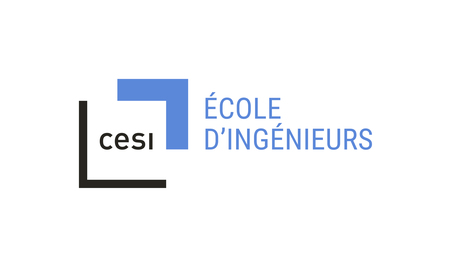


<center> 
    GIRARD-TISSIER Ugo
     | 
    GISLARD Enzo
     | 
    GUESMIA Abdelrahmane
     | 
    CASENOVE Antoine
</center>

# 1. Introduction

bite

# 2. Préparation des données

### A. Chargement des jeux de données

Les données fournies par HumanForYou ont, dans un premier temps, été téléchargées et placées dans le répertoire `datasets`.

Nous allons maintenant créer une fonction utilisant [`Pandas`](https://pandas.pydata.org/) qui s'occupe de charger les données en mémoire dans un `Pandas DataFrame`.

In [1]:
import pandas as pd
import os

def load_datasets(path, file_name):
    csv_path = os.path.join(path, file_name)
    return pd.read_csv(csv_path)

Il est maintenant possible de charger nos données pour chaque fichier CSV transmis par HumanForYou

In [2]:
general_data = load_datasets("datasets", "general_data.csv")
manager_survey_data = load_datasets("datasets", "manager_survey_data.csv")
employee_survey_data = load_datasets("datasets", "employee_survey_data.csv")
in_time_data = load_datasets("datasets", "in_time.csv")
out_time_data = load_datasets("datasets", "out_time.csv")

Nous allons afficher les premières lignes de nos diffèrents tableaux `Pandas` pour en faire une première approche

In [3]:
general_data.head(2).style

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.000000,Y,11,8,0,1.000000,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.000000,Y,23,8,1,6.000000,3,5,1,4


In [4]:
manager_survey_data.head(2).style

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4


In [5]:
employee_survey_data.head(2).style

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.000000,4.000000,2.000000
1,2,3.000000,2.000000,4.000000


In [6]:
in_time_data.head(2).style

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,nan,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,nan,2015-01-15 10:01:24,2015-01-16 10:19:08,nan,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,nan,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,nan,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,nan,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,nan,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,nan,2015-03-27 09:47:30,2

In [7]:
out_time_data.head(2).style

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,nan,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,nan,2015-01-15 17:22:13,2015-01-16 17:35:11,nan,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,nan,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,nan,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,nan,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,nan,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,nan,2015-03-27 17:20:51,2

### B. Construction d'un unique dataset

Pour éviter de se compliquer la tache, il est preferable de travailler avec un seul et unique dataset. Or l'entreprise nous a transmis des jeux de données qui sont liés à leurs employés. Nous allons donc essayer de "joindre" ces jeux de données en un seul tableau.

Nous vérifions dans un premier si nos tableaux `Pandas` contiennent le même nombre de ligne

In [8]:
print("Dimensions general_data :", general_data.shape)
print("Dimensions manager_survey_data :", manager_survey_data.shape)
print("Dimensions employee_survey_data :", employee_survey_data.shape)
print("Dimensions in_time_data :", in_time_data.shape)
print("Dimensions out_time_data :", out_time_data.shape)

Dimensions general_data : (4410, 24)
Dimensions manager_survey_data : (4410, 3)
Dimensions employee_survey_data : (4410, 4)
Dimensions in_time_data : (4410, 262)
Dimensions out_time_data : (4410, 262)


Bonne nouvelle! Les tableaux contiennent tous le même nombre de ligne. Il semblerait que nous ayons donc une ligne par employé dans chaque tableau. 

Nous pouvons commencer par essayer de "joindre" les tableaux `general_data` et `manager_survey_data`. En effet, ces deux tableaux ont une colonne similaire nommée `EmployeeID` qui semble la plus adaptée à une jointure. 

Avant de faire la jointure, nous allons vérifier qu'il n'y a pas de doublons sur cette donnée car cela pourrait planter notre jointure.

In [9]:
print("Nombre de ligne unique general_data : ", general_data.EmployeeID.unique().shape)
print("Nombre de ligne unique manager_survey_data : ", manager_survey_data.EmployeeID.unique().shape)

Nombre de ligne unique general_data :  (4410,)
Nombre de ligne unique manager_survey_data :  (4410,)


Parfait, le nombre d'élément unique est le même, nous pouvons faire la jointure sur cette colonne

In [10]:
dataset = general_data.join(manager_survey_data.set_index('EmployeeID'), how="inner", on="EmployeeID")
print ("Dimensions après jointure : ", dataset.shape)

Dimensions après jointure :  (4410, 26)


Nous obtenons bien le même nombre de ligne et nous avons bien les 24 colonnes de `general_data` plus les 2 colonnes de `manager_survey_data` (`EmployeeID` n'ayant été gardée qu'une seule fois lors de la jointure) 

Nous pouvons maintenant réexécuter cette procédure avec les tableaux `dataset` et `employee_survey_data`

In [11]:
print("Nombre de ligne unique employee_survey_data : ", employee_survey_data.EmployeeID.unique().shape)

Nombre de ligne unique employee_survey_data :  (4410,)


In [12]:
dataset = dataset.join(employee_survey_data.set_index('EmployeeID'), how="inner", on="EmployeeID")
print ("Dimensions après jointure : ", dataset.shape)

Dimensions après jointure :  (4410, 29)


Les tableaux `in_time_data` et `out_time_data` ne contiennent pas de colonne nommée `EmployeeID`. Cependant la première colonne de ces deux tableaux y ressemble beaucoup. Nous allons vérifier si celle-ci contient des données uniques, si oui alors nous utiliserons cette colonne en tant qu'ID de jointutre.

In [13]:
in_time_data.rename( columns={'Unnamed: 0':'EmployeeID'}, inplace=True )
out_time_data.rename( columns={'Unnamed: 0':'EmployeeID'}, inplace=True )
print("Nombre de ligne unique in_time_data : ", in_time_data.EmployeeID.unique().shape)
print("Nombre de ligne unique out_time_data : ", out_time_data.EmployeeID.unique().shape)

Nombre de ligne unique in_time_data :  (4410,)
Nombre de ligne unique out_time_data :  (4410,)


In [14]:
dataset = dataset.join(in_time_data.set_index('EmployeeID'), how="inner", on="EmployeeID")
dataset = dataset.join(out_time_data.set_index('EmployeeID'), how="inner", on="EmployeeID", lsuffix='_in', rsuffix='_out')

In [15]:
dataset.head().style

Notre variable `dataset` est maintenant le résultat de la jointure de tout les tableaux fournit par HumanForYou, ce qui sera beaucoup plus simple à exploiter pour plus tard. Une dernière amélioration possible est de transformer la colonne `EmployeeID` en index de notre tableau car ce ne sera surement pas une variable inpactante dans nos futures prédictions.

In [16]:
dataset = dataset.set_index('EmployeeID')

In [18]:
dataset.head().style

### C. Bite